# Manejo de pixels con NumPy y Matplotlib

In [1]:
%pylab notebook
import requests

Populating the interactive namespace from numpy and matplotlib


Por las dudas, instalamos Pillow para poder leer imágenes que vengan en formato que no sea PNG y requests para descargar recursos de internet más fácilmente que con urllib.

In [25]:
!conda install -y pillow requests

Fetching package metadata .......
Solving package specifications: ..........
Using Anaconda Cloud api site https://api.anaconda.org

# All requested packages already installed.
# packages in environment at /Users/nahuel/anaconda/envs/default:
#
pillow                    3.3.1                    py35_0  
requests                  2.11.1                   py35_0  


Algunas URLs para nuestra prueba

In [26]:
url = 'http://dc.itamaraty.gov.br/imagens-e-textos/imagens-do-brasil/fauna/alta-fauna15.jpg/image_preview'
#url = 'http://static.americatv.com.ar/adjuntos/212/imagenes/007/775/0007775435.jpg'
#url = 'http://celebrity.red/jdd/public/documents/red/news/10/tom-cruise.jpg'
resp = requests.get(url, stream=True)

In [27]:
img = imread(resp.raw, format='jpg')

In [28]:
imshow(img)

# Mostrando los píxeles menos significativos
Para que la operación sea eficiente, debemos evitar iterar y usar las funciones provistas por el numpy array.


In [29]:
"La imagen tiene %d x %d  y %d canales de color" % img.shape

'La imagen tiene 300 x 400  y 3 canales de color'

# Mascara AND 2 bits menos significativos y luego rotación izquierda

In [30]:
nueva = np.copy(img)
nueva &= 0b00000011
# No hay poerdardor <<= así que usamos el que provee numpy
nueva = np.left_shift(nueva, 6)

In [31]:
imshow(nueva)

Pareciera que a la imagen le han hecho algún retoque en la nuca (justamente dónde aparece el monitor)

<IPython.core.display.Javascript object>


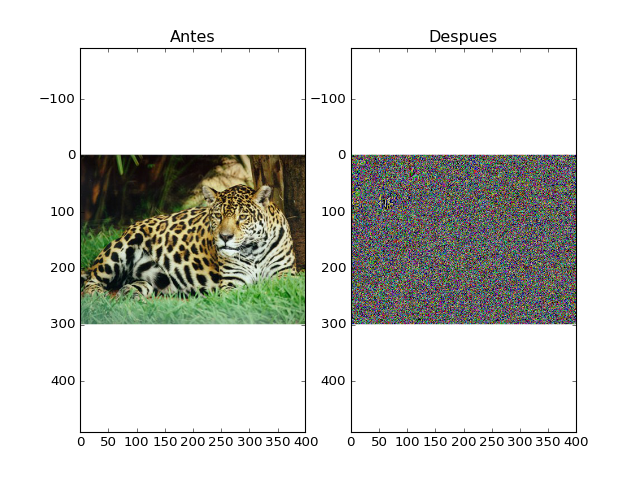

In [32]:
fig = plt.figure()
antes=fig.add_subplot(1,2,1)
lum_img = img #[:,:,0]
imgplot = plt.imshow(lum_img)
antes.set_title('Antes')
#plt.colorbar(ticks=[0.1,0.3,0.5,0.7], orientation ='horizontal')
a=fig.add_subplot(1,2,2, sharex=antes)
imgplot = plt.imshow(nueva)
#imgplot.set_clim(0.0,0.7)
a.set_title('Despues')
